In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import os
import requests
import re        #a little bit of regex needed for processing responses
from collections import OrderedDict
import json      #this thing helped processing json objects manually
import pickle     #saves data in a python type in hard storage
from googleapiclient import errors  #I ended up not using the Google libs, but they exist
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
plt.style.use('ggplot')

In [3]:
with open('api_key.txt', 'r') as api_key_file:
        api_key = api_key_file.read().rstrip()
        
# with open('secret.txt') as f_sec:
#         APP_SECRET = f_sec.read().rstrip()

# Using the Youtube API

In [44]:
#######################################################################
#These libraries are not needed for this project, but they provide   ##
#additional functionality for other Google API calls                 ##
#######################################################################
'''
!pip install google-api-python-client
!pip install google-auth-oauthlib google-auth-httplib2
'''

'\n!pip install google-api-python-client\n!pip install google-auth-oauthlib google-auth-httplib2\n'

### a little function to help view the structure of the output data

In [45]:
def drill_down(nest, level=''):
    '''prints the structure out of a json object'''
    '''only needed for analyzing the response structure'''
    for n, a in enumerate(nest):        
        t = type(nest[a])
        print(level, n, a, type(nest[a]), ('of '+ str(type(nest[a][0])) if t == list else '') )
        if type(nest[a]) == list:
            drill_down(nest[a][0], level=level+'\t')
        elif type(nest[a]) == dict:
            drill_down(nest[a], level = level + '\t')

In [20]:
cat_lookup = {}
id_pattern = ''' "id": "([0-9]+)",'''
cat_pattern = ''' "title": "[^"]+",'''
for n, line in enumerate(categories_response.text.split('\n')):
    print(n, line)
    if re.findall(id_pattern, line):
        id = re.findall('''[0-9]+''', line)[0]
    if re.findall(cat_pattern, line):
        cat = re.findall(''': "[^"]+"''', line)[0][3:-1]
        print(cat)
        cat_lookup[int(id)] = cat      
print(cat_lookup)    

0 {
1  "kind": "youtube#videoCategoryListResponse",
2  "etag": "\"xwzn9fn_LczrfK9QS3iZcGzqRGs/S730Ilt-Fi-emsQJvJAAShlR6hM\"",
3  "items": [
4   {
5    "kind": "youtube#videoCategory",
6    "etag": "\"xwzn9fn_LczrfK9QS3iZcGzqRGs/Xy1mB4_yLrHy_BmKmPBggty2mZQ\"",
7    "id": "1",
8    "snippet": {
9     "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
10     "title": "Film & Animation",
Film & Animation
11     "assignable": true
12    }
13   },
14   {
15    "kind": "youtube#videoCategory",
16    "etag": "\"xwzn9fn_LczrfK9QS3iZcGzqRGs/UZ1oLIIz2dxIhO45ZTFR3a3NyTA\"",
17    "id": "2",
18    "snippet": {
19     "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
20     "title": "Autos & Vehicles",
Autos & Vehicles
21     "assignable": true
22    }
23   },
24   {
25    "kind": "youtube#videoCategory",
26    "etag": "\"xwzn9fn_LczrfK9QS3iZcGzqRGs/nqRIq97-xe5XRZTxbknKFVe5Lmg\"",
27    "id": "10",
28    "snippet": {
29     "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
30     "title": "Music",
Music
31     "assignable": tr

In [7]:
# Exploring the structure of the response
# See https://developers.google.com/youtube/v3/docs/videoCategories/list

drill_down(categories_response.json())
drill_down(guide_categories_response.json())

 0 kind <class 'str'> 
 1 etag <class 'str'> 
 2 items <class 'list'> of <class 'dict'>
	 0 kind <class 'str'> 
	 1 etag <class 'str'> 
	 2 id <class 'str'> 
	 3 snippet <class 'dict'> 
		 0 channelId <class 'str'> 
		 1 title <class 'str'> 
		 2 assignable <class 'bool'> 
 0 kind <class 'str'> 
 1 etag <class 'str'> 
 2 items <class 'list'> of <class 'dict'>
	 0 kind <class 'str'> 
	 1 etag <class 'str'> 
	 2 id <class 'str'> 
	 3 snippet <class 'dict'> 
		 0 channelId <class 'str'> 
		 1 title <class 'str'> 


In [ ]:
url = '''https://www.googleapis.com/youtube/v3/videos?part=statistics&id='''
url += page
url += '&key='
angies_video = requests.request('GET', url + api_key)

In [ ]:
angies_video.json()['items'][0]['statistics']['viewCount']

In [ ]:
https://www.googleapis.com/youtube/v3/videos?part=snippet%2CcontentDetails%2Cstatistics&id=Ks-_Mh1QhMc&key=[YOUR_API_KEY] HTTP/1.1


In [ ]:
fig, ax = plt.subplots()

In [16]:
#A few test videos

chickensan_bad_guy = 'IncQIx_m_FM'    #Watch at your own risk
ten_hour_video     = 'L_LUpnjgPso'    #Just something really long
angies_video       = 'jTHWAxcMNk0'    #Ms Hintz's video of Google Classroom

In [14]:
def pull_page_info(video_id, **kwargs):
    menu_selection = ['snippet', 'contentDetails', 'statistics']    #I just picked these from their menu
    parts = '%2C'.join(menu_selection)   #join the parts together in a comma separated list, in url encoding as '%2C'
    url = f'https://www.googleapis.com/youtube/v3/videos?part={parts}&id={video_id}&key={api_key}'
    return requests.request('GET', url)

In [17]:
new = pull_page_info(angies_video)

print('error' if new.status_code != 200 else 'ok')
new.status_code

ok


200

In [18]:
drill_down(new.json())

 0 kind <class 'str'> 
 1 etag <class 'str'> 
 2 pageInfo <class 'dict'> 
	 0 totalResults <class 'int'> 
	 1 resultsPerPage <class 'int'> 
 3 items <class 'list'> of <class 'dict'>
	 0 kind <class 'str'> 
	 1 etag <class 'str'> 
	 2 id <class 'str'> 
	 3 snippet <class 'dict'> 
		 0 publishedAt <class 'str'> 
		 1 channelId <class 'str'> 
		 2 title <class 'str'> 
		 3 description <class 'str'> 
		 4 thumbnails <class 'dict'> 
			 0 default <class 'dict'> 
				 0 url <class 'str'> 
				 1 width <class 'int'> 
				 2 height <class 'int'> 
			 1 medium <class 'dict'> 
				 0 url <class 'str'> 
				 1 width <class 'int'> 
				 2 height <class 'int'> 
			 2 high <class 'dict'> 
				 0 url <class 'str'> 
				 1 width <class 'int'> 
				 2 height <class 'int'> 
			 3 standard <class 'dict'> 
				 0 url <class 'str'> 
				 1 width <class 'int'> 
				 2 height <class 'int'> 
		 5 channelTitle <class 'str'> 
		 6 categoryId <class 'str'> 
		 7 liveBroadcastContent <class 'str'> 
		 8 localized

In [19]:
_ = json.loads(new.text)
short = _['items'][0]['contentDetails']['duration']
print(short)

PT5M32S


In [20]:
a = pull_page_info(ten_hour_video)
long = json.loads(a.text)['items'][0]['contentDetails']['duration']
print(long)
# Testing to see how the duration field is written

PT10H1M26S


In [25]:
# They all start with 'PT' (play time?) then the time in nHnMnS
# import re     #regex was imported earlier
def calc_seconds(duration):
    pattern = '[0-9]+[HMS]'
    result = re.findall(pattern, duration)
    #result for 10 hours, 1 minute, 26 seconds = ['10H', '1M', '26S']
    
    nums = [int(val[:-1]) for val in result]
    
    if len(nums) == 1:
        nums = [0, 0].append(nums[0])
    elif len(nums) == 2:
        nums = [0] + nums
        print(nums)
        
    factors = np.array([3600, 60, 1])
    seconds = nums[0] * 60 * 60 + nums[1]*60 + nums[2]
    return seconds

In [26]:
print(long, end='\t')
seconds = calc_seconds(long)
print(str(seconds))
# Looks good...

PT10H1M26S	36086


In [54]:
df = pd.read_csv('data/20.08.04.10.42_US_videos.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           200 non-null    object
 1   title              200 non-null    object
 2   publishedAt        200 non-null    object
 3   channelId          200 non-null    object
 4   channelTitle       200 non-null    object
 5   categoryId         200 non-null    int64 
 6   trending_date      200 non-null    object
 7   tags               200 non-null    object
 8   view_count         200 non-null    int64 
 9   likes              200 non-null    int64 
 10  dislikes           200 non-null    int64 
 11  comment_count      200 non-null    int64 
 12  thumbnail_link     200 non-null    object
 13  comments_disabled  200 non-null    bool  
 14  ratings_disabled   200 non-null    bool  
 15  description        198 non-null    object
dtypes: bool(2), int64(5), object(9)
memory usage

,categoryId,title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


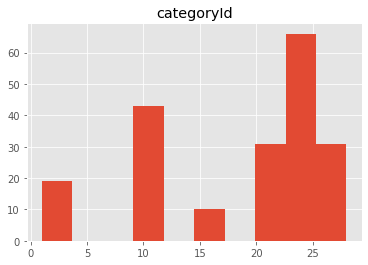

In [65]:
df.info()
df.hist('categoryId')
print(df[['categoryId', 'video_id']].groupby("categoryId").count())
categories[['categoryId', 'title']]

In [67]:
categories = categories.rename(columns={"id": "categoryId"})
test = categories['categoryId'].apply(pd.to_numeric)

In [50]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   kind        32 non-null     object
 1   etag        32 non-null     object
 2   categoryId  32 non-null     int64 
 3   snippet     32 non-null     object
 4   channelId   32 non-null     object
 5   title       32 non-null     object
 6   assignable  32 non-null     bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 1.7+ KB


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kind     11 non-null     object
 1   etag     11 non-null     object
 2   id       11 non-null     object
 3   snippet  11 non-null     object
dtypes: object(4)
memory usage: 480.0+ bytes


In [71]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [72]:
# Renaming the categories primary key to match the foreign key of the videos data
# (there's a way to join without doing this, but...)
categories = categories.rename(columns={"id": "categoryId"})
cat = categories
categories = categories.astype({"categoryId": 'int64'}) 

In [51]:
df.info()
df_cat = df.groupby('category').sum()
df_cat['like_view_ratio'] = df_cat.apply(lambda row: row.likes / row.view_count, axis=1)
df_cat['dislike_view_ratio'] = df_cat.apply(lambda row: row.dislikes / row.view_count, axis=1)
df_cat


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           200 non-null    int64 
 1   video_id       200 non-null    object
 2   title          200 non-null    object
 3   publishedAt    200 non-null    object
 4   channelId      200 non-null    object
 5   channelTitle   200 non-null    object
 6   categoryId     200 non-null    int64 
 7   category       200 non-null    object
 8   trending_date  200 non-null    object
 9   tags           200 non-null    object
 10  view_count     200 non-null    int64 
 11  likes          200 non-null    int64 
 12  dislikes       200 non-null    int64 
 13  comment_count  200 non-null    int64 
 14  duration       200 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 23.6+ KB


,rank,categoryId,view_count,likes,dislikes,comment_count,duration,like_view_ratio,dislike_view_ratio
category,,,,,,,,,
Autos & Vehicles,380,8,6682742,248698,5177,23035,3325,0.037215,0.000775
Comedy,1021,276,11006596,688595,13239,55004,8221,0.062562,0.001203
Education,549,189,13165219,697926,10252,71262,4586,0.053013,0.000779
Entertainment,3799,1008,68880218,3206180,85084,412077,30309,0.046547,0.001235
Film & Animation,1543,17,25385157,1460812,17631,123442,14834,0.057546,0.000695
Gaming,2021,340,33154554,1644309,32215,179776,12759,0.049595,0.000972
Howto & Style,2302,494,28259629,965111,27204,80241,16776,0.034152,0.000963
Music,4385,420,251811018,12882123,354933,545857,47835,0.051158,0.001410
News & Politics,1264,300,21375083,212244,21179,55753,42900,0.009930,0.000991


AttributeError: 'numpy.ndarray' object has no attribute 'xticks'

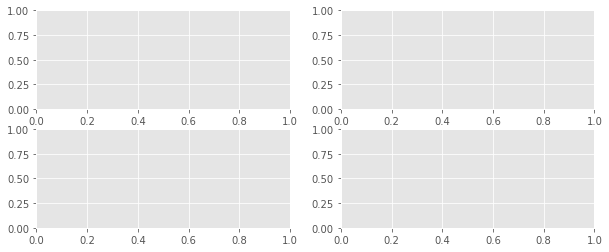

In [46]:
fig, ax = plt.subplots(2,2,figsize=(10,4))
ax.xticks(rotation=45)

ax[0].set_title("Likes to Views Ratio")
ax[0].set_xlabel("This is an x-label")
ax[0].set_ylabel("This is a y-label!")

ax.scatter(x, y)

fig.tight_layout()

# x will be the left hand edge of the bars.
x = np.arange(len(record_counts['genre']))

fig, ax = plt.subplots()

bars = ax.bar(x, record_counts['count'])
# Make the ticks at the center of the bar using:
#   center = left_edge + 0.5*width
ax.set_xticks(x)
ax.set_xticklabels(record_counts['genre'])

In [ ]:
df.head()

In [27]:
print(df.sort_values('view_count')['view_count'])
df_sorted = df.sort_values('view_count')
df_sorted['view_count'].plot()
df.hist('view_count', bins=1000)
# plt.setlabel('Label')

KeyError: 'view_count'

In [40]:
fig, ax = plt.hist() 

df['category'].hist().xticks(rotation=45)

# ax.xticks(rotation=45)

ax.set_title("This is a Great Plot!")
ax.set_xlabel("This is an x-label")
ax.set_ylabel("This is a y-label!")

NameError: name 'plt' is not defined

In [43]:
cats = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}

In [44]:
for cat in cats:
    print(cat)

1
2
10
15
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44


In [48]:
import time
timestamp = time.strftime('%y.%m.%d.%H:%M')
print(timestamp)

20.04.10.06:17


In [75]:
import requests, sys, time, os, argparse, json, csv, pickle

# List of simple to collect features
snippet_features = ["title", "publishedAt", "channelId", "channelTitle", "categoryId"]

# Used to identify columns, currently hardcoded order
header = ["rank", "video_id"] + snippet_features + ["category", "trending_date", "tags", "view_count", "likes", "dislikes", "comment_count","duration"]
                                            
things_that_i_dont_want_to_include = ["thumbnail_link", "comments_disabled","ratings_disabled", "description"]

# Any characters to exclude, generally these are things that become problematic in CSV files
unsafe_characters = ['\n', '"']

cats = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}

def prepare_feature(feature):
    # Removes any character from the unsafe characters list and surrounds the whole item in quotes
    for ch in unsafe_characters:
        feature = str(feature).replace(ch, "")
    return f'"{feature}"'


def api_request(pageToken='', by_cat=False, trending=True, catId='', items=[], n=0):
#     Calls the API and returns a list of items. It has to iterate through recursively
#     a few times because the full response is split up into multiple pages
    
    url_base  = 'https://www.googleapis.com/youtube/v3/videos?'
    features  =f'part=snippet%2CcontentDetails%2Cstatistics&{pageToken}'
    category  =f'videoCategoryId={catId}&' if by_cat else ''
    chart     = 'chart=mostPopular&' if trending else ''
    other     =f'{chart}regionCode=US&{category}key='
    url       =  url_base + features + other + api_key
    response  =  requests.get(url)
    
    if response.status_code == 429:
        print("Temp-Banned due to excess requests, please wait and continue later")
        sys.exit()
    response = response.json()
    
    itms_lst  =  response['items']
    for item in itms_lst:
        n+=1
        item['rank'] = n
        items.append(item)
        
#     The response doesn't return all the results. Use the token to get the next page
    token    =  response.get("nextPageToken", None)
    if token != None:
        pageToken = f'pageToken={token}&'
        api_request(pageToken=pageToken, items = items, n=n)
    timestamp = time.strftime('%y.%m.%d.%H:%M')
    with open(f'items_{timestamp}.pickle', 'wb') as pickly:
        pickle.dump(items, pickly)    
    return items


def get_tags(tags_list):
    # Takes a list of tags, prepares each tag and joins them into a string by the pipe character
    return prepare_feature("|".join(tags_list))


def calc_seconds(duration):
#     Takes the YouTube duration field and calculated seconds
    hms = 'HMS'
    nums = [0,0,0]
    pattern = '[0-9]+[HMS]'
    result = re.findall(pattern, duration)
    #result for 10 hours, 1 minute, 26 seconds = ['10H', '1M', '26S']
    for val in result:
        nums[hms.index(val[-1])] = int(val[:-1])    
    seconds = nums[0] * 60 * 60 + nums[1]*60 + nums[2]
    return seconds

def parse_videos(items):
    lines = []
    for video in items:
        # We can assume something's wrong with a video with no stats, likely deleted
        if "statistics" not in video:
            continue
        # A full explanation of all of these features can be found on the GitHub page for this project
        rank = video['rank']       #I added this rank during processing
        video_id = prepare_feature(video['id'])

        # Snippet and statistics are sub-dicts of video, containing the most useful info
        snippet = video['snippet']
        statistics = video['statistics']
        contentDetails = video['contentDetails']

        # This list contains all of the features in snippet that are 1 deep and require no special processing
        features = [prepare_feature(snippet.get(feature, "")) for feature in snippet_features[:-1]]
        features.append(snippet.get('categoryId'))
#         Add the text of the category
        category = prepare_feature(cats[int(features[-1])])
        features.append(category)
        print(features) 

        # The following are special case features which require unique processing, or are not within the snippet dict
        description = snippet.get("description", "")
        trending_date = time.strftime("%y.%m.%d")
        tags = get_tags(snippet.get("tags", ["[none]"]))
        view_count = statistics.get("viewCount", 0)
        duration = calc_seconds(contentDetails.get("duration", 0))
        likes = statistics.get('likeCount', 0)
        dislikes = statistics.get('dislikeCount', 0)
        comment_count = statistics.get('commentCount', 0)

        # Compiles all of the various bits of info into one consistently formatted line
        line = [rank, video_id] + features + [prepare_feature(x) for x in [trending_date, tags] + [view_count, duration, likes, dislikes, comment_count]]
        print(line)
        lines.append(line)
        print(lines)
    return lines


def write_to_file(lines):
    print(f"Writing video data to file {time.strftime('%y.%m.%d.%H:%M')}...")

    with open(f"{output_dir}/{time.strftime('%y.%m.%d.%H:%M')}_US_videos.csv", "w+", encoding='utf-8') as file:
        for row in lines:
            file.write(f"{row}\n")
    with open(f"{output_dir}/videos.csv", "a+", encoding='utf-8') as file:
        for row in lines:
            csv.writer(file).writerow(row)
            print('Done with that one')

if __name__ == "__main__":
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--key_path', help='Path to the file containing the api key, by default will use api_key.txt in the same directory', default='api_key.txt')
#     parser.add_argument('--country_code_path', help='Path to the file containing the list of country codes to scrape, by default will use country_codes.txt in the same directory', default='country_codes.txt')
#     parser.add_argument('--output_dir', help='Path to save the outputted files in', default='data/')
#     args = parser.parse_args()
    while True:
        output_dir = 'data/'
        with open('api_key.txt', 'r') as file:
            api_key = file.read().rstrip()
        for cat in cats:
            lines = parse_videos(api_request(by_cat=True, trending=True, catId=cat))
            write_to_file(lines)
        lines = parse_videos(api_request(by_cat=False))
        write_to_file(lines)
            
        os.sleep(1800)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



KeyboardInterrupt: 

In [4]:
import pickle
filename = 'items_20.04.10.06:57.pickle'

with open(filename, 'rb') as pickle_cat:
    items = pickle.load(pickle_cat)

In [22]:
import requests, sys, time, os, argparse, json, csv, pickle, re
header = ["rank", "video_id"] +  ["title", "publishedAt", "channelId", "channelTitle", "categoryId"] + ["category", "trending_date", "tags", "view_count", "likes", "dislikes", "comment_count", "duration"]
snippet_features = ["title", "publishedAt", "channelId", "channelTitle", "categoryId"]
cats = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


In [19]:
# Any characters to exclude, generally these are things that become problematic in CSV files
unsafe_characters = ['\n', '"']

cats = {1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}

def prepare_feature(feature):
    # Removes any character from the unsafe characters list and surrounds the whole item in quotes
    for ch in unsafe_characters:
        feature = str(feature).replace(ch, "")
    return f'"{feature}"'

def get_tags(tags_list):
    # Takes a list of tags, prepares each tag and joins them into a string by the pipe character
    return prepare_feature("|".join(tags_list))

def calc_seconds(duration):
#     Takes the YouTube duration field and calculated seconds
    hms = 'HMS'
    nums = [0,0,0]
    pattern = '[0-9]+[HMS]'
    result = re.findall(pattern, duration)
    #result for 10 hours, 1 minute, 26 seconds = ['10H', '1M', '26S']
    for val in result:
        nums[hms.index(val[-1])] = int(val[:-1])    
    seconds = nums[0] * 60 * 60 + nums[1]*60 + nums[2]
    return seconds

In [20]:
def parse_videos(items):
    lines = []
    for video in items:
        # We can assume something's wrong with a video with no stats, likely deleted
        if "statistics" not in video:
            continue
        # A full explanation of all of these features can be found on the GitHub page for this project
        rank = video['rank']       #I added this rank during processing
        video['video_id'] = video['id']

        # Snippet and statistics are sub-dicts of video, containing the most useful info
        snippet = video['snippet']
        statistics = video['statistics']
        contentDetails = video['contentDetails']

        # This list contains all of the features in snippet that are 1 deep and require no special processing
        for feature in snippet_features[:-1]:
            video[feature] = snippet.get(feature, "") 
        video['categoryId'] = int(snippet.get('categoryId'))
#         Add the text of the category
        video['category'] = cats[video['categoryId']]

        # The following are special case features which require unique processing, or are not within the snippet dict
#         description = snippet.get("description", "")
        video['trending_date'] = time.strftime("%y.%m.%d")
        video['tags'] = get_tags(video['snippet'].get("tags", ["[none]"]))
        video['view_count'] = int(video['statistics'].get("viewCount", 0))
        video['duration'] = calc_seconds(video['contentDetails'].get("duration", 0))
        video['likes'] = int(video['statistics'].get('likeCount', 0))
        video['dislikes'] = int(video['statistics'].get('dislikeCount', 0))
        video['comment_count'] = int(video['statistics'].get('commentCount', 0))
        new_video = {x:video[x] for x in header}
        lines.append(new_video)
    return lines

In [32]:
lines = parse_videos(items)


In [33]:
import pandas as pd
df = pd.DataFrame(lines)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           200 non-null    int64 
 1   video_id       200 non-null    object
 2   title          200 non-null    object
 3   publishedAt    200 non-null    object
 4   channelId      200 non-null    object
 5   channelTitle   200 non-null    object
 6   categoryId     200 non-null    int64 
 7   category       200 non-null    object
 8   trending_date  200 non-null    object
 9   tags           200 non-null    object
 10  view_count     200 non-null    int64 
 11  likes          200 non-null    int64 
 12  dislikes       200 non-null    int64 
 13  comment_count  200 non-null    int64 
 14  duration       200 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 23.6+ KB


In [38]:
df.head()
df.to_csv(r'data/videos_2020.04.10_11.24.csv', index = False)

In [92]:
for thing in first:
    print(thing)
    if thing == 'snippet':
        snippet = first['snippet']
        for a in snippet:
            print('\t', a)
            
cat = first['snippet']['categoryId']
cat

kind
etag
id
snippet
	 publishedAt
	 channelId
	 title
	 description
	 thumbnails
	 channelTitle
	 tags
	 categoryId
	 liveBroadcastContent
	 localized
contentDetails
statistics
rank


'22'